In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyssht as ssht
import massmappy.cy_mass_mapping as mm
from matplotlib import cm, colors, colorbar, gridspec
import os

In [3]:
# Configuration of the demo
L = 256
lmax = L-1
orth_resolution = 1000
mol_resolution = 1000
Method = "MW"

Add_noise    = False
Reduce_shear = True

Cls = np.loadtxt(os.environ["MASSMAPPY"]+"/data/cls_ap.txt")

In [4]:
print("mm.generate_kappa_lm_mw")
k_lm_mw = mm.generate_kappa_lm_mw(np.array(Cls[:,1]), L, 2)

print("ssht.guassian_smoothing")
ks_lm_mw = ssht.guassian_smoothing(k_lm_mw, L, sigma_in=np.pi/L)

print("ssht.inverse")
k_mw = ssht.inverse(ks_lm_mw, L, Reality=True, Method=Method)

print("mm.kappa_lm_to_gamma_lm_mw")
gamma_lm = mm.kappa_lm_to_gamma_lm_mw(ks_lm_mw, L)

print("ssht.inverse")
gamma = ssht.inverse(gamma_lm, L, Method=Method, Spin=2)

if Reduce_shear:
	print("Reducing Shear")
	shear = gamma/(1.0-k_mw)
else:
	shear = gamma

if  Add_noise:
	print("adding noise")
	shear = shear + 0.005*(np.random.randn(L,2*L-1) + 1j*np.random.randn(L,2*L-1))

print("Reconstruct on the sphere MW")
k_rec_mw, count = mm.reduced_shear_to_kappa_mw(shear, L, Iterate=Reduce_shear, Method=Method, tol_error=1E-10, return_count=True, sigma=-1)

if Reduce_shear:
	print("Number of iterations: ", count)
print("rms error: ", np.sqrt(np.mean((k_rec_mw.real-k_mw)**2)))

mm.generate_kappa_lm_mw
ssht.guassian_smoothing
ssht.inverse
mm.kappa_lm_to_gamma_lm_mw
ssht.inverse
Reducing Shear
Reconstruct on the sphere MW
Number of iterations:  4
rms error:  9.02617175151e-15


Plot original convergence


(-0.5, 1999.5, 999.5, -0.5)

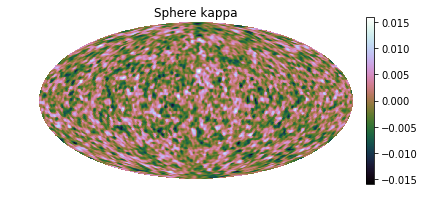

In [5]:
print("Plot original convergence")
f_plot, masked_array = ssht.mollweide_projection(k_mw, L, resolution=mol_resolution, Method=Method)
plt.figure()
imgplot = plt.imshow(f_plot,interpolation='nearest', cmap="cubehelix", vmin=-0.016, vmax=0.016)
plt.colorbar(imgplot,fraction=0.025, pad=0.04)
plt.imshow(masked_array, interpolation='nearest', cmap=cm.gray, vmin=-1., vmax=1.)
plt.gca().set_aspect("equal")
plt.title("Sphere kappa")
plt.axis('off')

Plot recovered convergence


(-0.5, 1999.5, 999.5, -0.5)

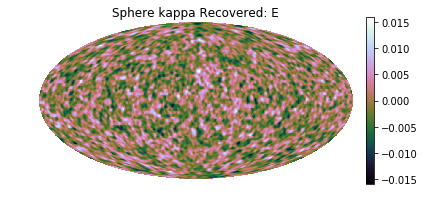

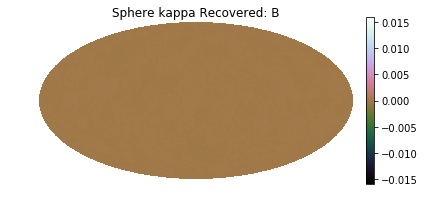

In [7]:
print("Plot recovered convergence")
f_real_plot, mask_real, f_imag_plot, mask_imag = ssht.mollweide_projection(k_rec_mw, L, resolution=mol_resolution, Method=Method)
plt.figure()
imgplot = plt.imshow(f_real_plot,interpolation='nearest', cmap="cubehelix", vmin=-0.016, vmax=0.016)
plt.colorbar(imgplot,fraction=0.025, pad=0.04)
plt.imshow(mask_real, interpolation='nearest', cmap=cm.gray, vmin=-1., vmax=1.)
plt.gca().set_aspect("equal")
plt.title("Sphere kappa Recovered: E")
plt.axis('off')

plt.figure()
imgplot = plt.imshow(f_imag_plot,interpolation='nearest', cmap="cubehelix", vmin=-0.016, vmax=0.016)
plt.colorbar(imgplot,fraction=0.025, pad=0.04)
plt.imshow(mask_real, interpolation='nearest', cmap=cm.gray, vmin=-1., vmax=1.)
plt.gca().set_aspect("equal")
plt.title("Sphere kappa Recovered: B")
plt.axis('off')